# 分类变量与分类变量之间的相关分析

## 卡方独立性检示例
下面是某医院统计的吸烟与患呼吸道疾病列联表

|        | 患病 | 不患病 | 总计 |
| ------ | ---- | ------ | ---- |
| 吸烟   | 37   | 183    | 220  |
| 不吸烟 | 21   | 274    | 295  |
| 总计   | 58   | 457    | 515  |



构造矩阵：
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}=\begin{bmatrix}
37 & 183 \\
21 & 274
\end{bmatrix}

In [2]:
import numpy as np
def Confusion(a, b, c, d):
    #       y1  y2
    data = np.array(([a, b],     #   x1   a   b
                    [c, d]), dtype=np.float)    #   x2   c   d
    return(data)

confusion = Confusion(37, 183, 21, 274) # a, b, c, d随意定自然数

print(confusion)

[[ 37. 183.]
 [ 21. 274.]]


计算：
$$
\chi^2=\frac{n(a d-b c)}{(a+c)(b+d)(a+b)(c+d)}
$$
其中，
$$
n=a+b+c+d
$$
为自由度

In [3]:
def chi_square(confusion):
    
    a = confusion[0, 0]
    b = confusion[0, 1]
    c = confusion[1, 0]
    d = confusion[1, 1]
    
    chi2 = (a+b+c+d)*(a*d - b*c)**2/\
    ((a+c)*(b+d)*(a+b)*(c+d))
    return chi2

chi2 = chi_square(confusion)
print('chi2 = %0.3f'%chi2)

chi2 = 11.863


In [4]:
from  scipy.stats import chi2_contingency # 导入卡方独立性检验

chi2 = chi2_contingency(confusion, correction=False)

print(chi2) # (chi2, p-value, df（degree of freedom, 自由度）, expected_frequency) # 这里使用了一个Yates’ correction，令自由度为1

(11.863417309823273, 0.0005724740050827233, 1, array([[ 24.77669903, 195.22330097],
       [ 33.22330097, 261.77669903]]))


In [5]:
print('chi2\t= %.3f,\np-value\t= %.3f,\ndf\t= %i,\ne_freq\t= \n%s'%chi2)

chi2	= 11.863,
p-value	= 0.001,
df	= 1,
e_freq	= 
[[ 24.77669903 195.22330097]
 [ 33.22330097 261.77669903]]


由于$\chi^2=11.863>10.913$，即有$P(\chi^2>10.913)=0.001$，故有99.9%的把握认为吸烟与患病有关系。

# 分类变量和度量变量之间的相关分析

## F检验示例

In [21]:
import numpy as np

data = np.loadtxt('DATA/Data_F_test.csv', skiprows = 1, delimiter = ',')
print(data)

[[0.84 0.54]
 [1.05 0.64]
 [1.2  0.64]
 [1.2  0.75]
 [1.39 0.76]
 [1.53 0.81]
 [1.67 1.16]
 [1.8  1.2 ]
 [1.87 1.34]
 [2.07 1.35]
 [2.11 1.48]
 [ nan 1.56]
 [ nan 1.87]]


In [30]:
work1 = data[:11, 0] # 最后两个为NAN（not a number），我们忽略它
work0 = data[:, 1]

print('''
mean work1 : %0.3f, std work1 : %0.3f
mean work2 : %0.3f, std work2 : %0.3f
'''%(np.average(work1), np.std(work1),\
     np.mean(work0), np.std(work0)))




mean work1 : 1.521, std work1 : 0.402
mean work2 : 1.085, std work2 : 0.406



In [26]:
from  scipy.stats import f_oneway # 调用F检验单侧检验

f_oneway = f_oneway(work1, work0)

print(f_oneway) # (f, p-value)

F_onewayResult(statistic=6.369183061451465, pvalue=0.019337039677992465)


In [32]:
f, p = f_oneway

print('f\t= %0.3f\np\t= %0.3f'%(f, p))


f	= 6.369
p	= 0.019


样本的$F$值为6.369，对应的$p$值为0.019，即置信度为$1-0.019=98.066\%$，故有98.066%的把握认为有关系。

# 度量变量和度量变量之间的相关分析

## 线性回归的t检验示例

In [33]:
import pandas as pd

data = pd.read_csv('DATA/Data_T_test.csv', encoding = 'gb18030')
print(data)

   A市气温(℃)  B市气温(℃)
0       23       21
1       25       23
2       26       25
3       25       26
4       21       23
5       23       23
6       25       26
7       27       25
8       26       26
9       25       25


D:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


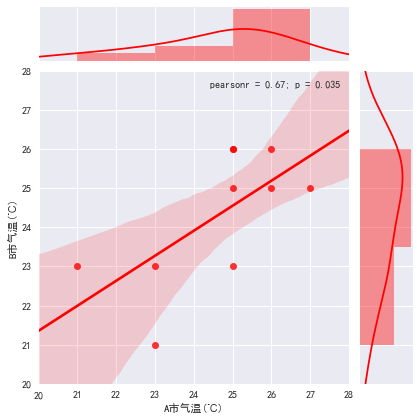

In [35]:
import seaborn as sns

sns.set(font='SimHei')

g = sns.jointplot("A市气温(℃)", "B市气温(℃)", data=data,
              kind="reg", truncate=False,
              xlim=(20, 28), ylim=(20, 28),
              color="r")

g.savefig("output.png", dpi=300)

In [36]:
data.corr() # 相关系数矩阵

,A市气温(℃),B市气温(℃)
A市气温(℃),1.000000,0.668485
B市气温(℃),0.668485,1.000000


In [37]:
r = data.corr().values[0, 1]
T = r / (((1 - r ** 2) / 8) ** 0.5)

print('r\t= %0.3f\nT\t= %0.3f'%(r, T))

r	= 0.668
T	= 2.542


In [41]:
from scipy import stats

df = len(data) - 2

p = stats.t.sf(T, df)

print('df\t= %d\np\t= %0.3f'%(df, p))


df	= 8
p	= 0.017


$T$值对应的$p$值为0.017，即有$1-0.017=98.27\%$的把握认为A市气温和B市气温有线性关系。